This Performance Task comprises of two deliverables: 

**A. LABORATORY (Google Collab Notebook):** As a modeler, you are instructed to create a regression model with your Independent variable (x) as Salinity and dependent variable as Temperature (y). The [dataset](https://www.kaggle.com/datasets/sohier/calcofi) spans from 1949 to 2016 but you were only told to use the data from 1949. 

You sought advice to your senior and advised you to either use Linear Regression, Decision Trees or Support Vector Machine. You were also given the following steps:

1. Preparation of data: Remove columns not needed, remove outliers, remove rows with empty cells, Plot the datapoints
2. Split the dataset into three parts: train (70%), validation (15%), and test(15%) sets.  
For each model in [Linear Regression, Decision Trees, Support Vector Machine]
3. Train the model. Plot the line.
4. Perform K-fold cross-validation on the validation set using the trained model
5. Calculate the evaluation metrics for regression: MSE, RMSE, MAE, and R-Squared (R2) individually using cross_val_score() of sci-kit learn. Store them in seperate variables: m1, m2, m3,m4. For each variale, calculate the mean using mi.mean() where i is the ith metric. Read this [article](https://machinelearningmastery.com/regression-metrics-for-machine-learning/#:~:text=There%20are%20three%20error%20metrics,Mean%20Absolute%20Error%20(MAE)) about MSE, RMSE, and MAE. The article also contains the meaning of values for MSE, RMSE, and MAR. For R2, it must be within 0-1. The higher the R2, the better. 
 
For all models: 
6. Compare the models based on the mentioned metrics in (5). 

*   Note 1: Use the cast.csv in the provided dataset
*   Note 2: The metrics mentioned in (5) are indicated here: https://scikit-learn.org/stable/modules/model_evaluation.html . Find the 3.3.1.1. Regression section. Those are the values that you'll put in the 'scoring' parameter of cross_val_score().

7. Test the best model on the test set and measure its performance using the metrics in (5)

**B. LECTURE (PDF)**
8. Discuss the results. 
9. Conclusion. 


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




---


---



# 1. Preparation of Data

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
dataset = pd.read_csv('/content/drive/MyDrive/datasets/bottle.csv') # *** directory of your dataset in csv. You can mount your Gdrive and reference here the path.  
dataset = dataset.head(911) # 911 is the number of samples in the year 1949

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
from numpy import percentile

# Removing Outliers using Interquartile Range (IQR) method
# calculate interquartile range
q25, q75 = percentile(dataset['T_degC'], 25), percentile(dataset['T_degC'], 75)
iqr = q75 - q25

# Calculate the outlier cutoff
cut_off = iqr * 1.5
lower, upper = q25 - cut_off, q75 + cut_off
outliers = [x for x in dataset['T_degC'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

for x in outliers:
  dataset.T_degC[dataset.T_degC==x] = np.nan

# Remove all empty cells i.e., cells with NaN
dataset.dropna(subset = ["Salnty"], inplace=True)
dataset.dropna(subset = ["T_degC"], inplace=True)

Identified outliers: 0


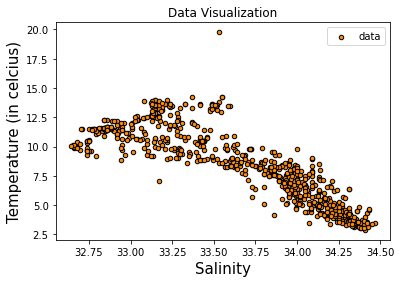

In [ ]:
# data visualization of the 2 variables
plt.figure()
plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.xlabel("Salinity", fontsize = 15)
plt.ylabel("Temperature (in celcius)", fontsize = 15)
plt.title("Data Visualization")
plt.legend()
plt.show()

# 2. Split the dataset into train, validation, and test sets

In [ ]:
from sklearn.model_selection import train_test_split

train_size=0.8
X_train, X_rem, y_train, y_rem = train_test_split(dataset['Salnty'], dataset['T_degC'], train_size=0.8)

test_size = 0.5
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.5)

# 3. Training the model



## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR_trained = LR.fit(X_train.values.reshape(-1, 1) ,y_train.values.reshape(-1, 1) )

In [ ]:
# Sort
sorted_X_test = np.sort(X_test)  # Need to specify axis=0 if X_test has shape (n_samples, 0)

LRPR = LR.predict(sorted_X_test.reshape(-1,1))

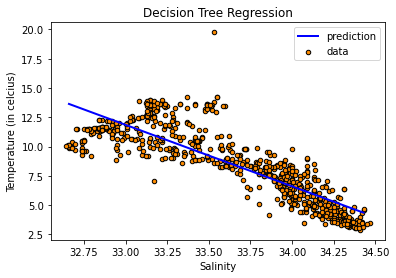

In [ ]:
# Plot the results
def LR_viz():
  plt.figure()
  plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot(sorted_X_test, LRPR, color="blue", label="prediction", linewidth=2)
  plt.xlabel("Salinity")
  plt.ylabel("Temperature (in celcius)")
  plt.title("Decision Tree Regression")
  plt.legend()
  plt.show()

LR_viz()

## Decision Trees

In [ ]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(X_train.values.reshape(-1, 1) ,y_train.values.reshape(-1, 1) )

DecisionTreeRegressor()

In [ ]:
# Sort
sorted_X_test = np.sort(X_test)  # Need to specify axis=0 if X_test has shape (n_samples, 0)

DTPR = DT.predict(sorted_X_test.reshape(-1, 1))

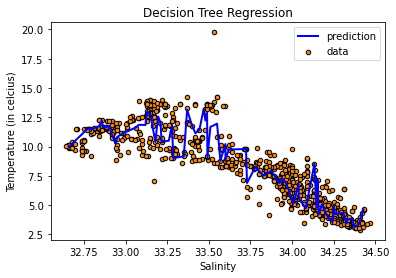

In [ ]:
# Plot the results
def DT_viz():
  plt.figure()
  plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot(sorted_X_test, DTPR, color="blue", label="prediction", linewidth=2)
  plt.xlabel("Salinity")
  plt.ylabel("Temperature (in celcius)")
  plt.title("Decision Tree Regression")
  plt.legend()
  plt.show()

DT_viz()

## Support Vector Machine

In [ ]:
from sklearn.svm import SVR
SVR = SVR()
SVR.fit(X_train.values.reshape(-1, 1) ,y_train.values.reshape(-1, 1))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [ ]:
# Sort
sorted_X_test = np.sort(X_test)  # Need to specify axis=0 if X_test has shape (n_samples, 0)

SVMPR = SVR.predict(sorted_X_test.reshape(-1, 1))

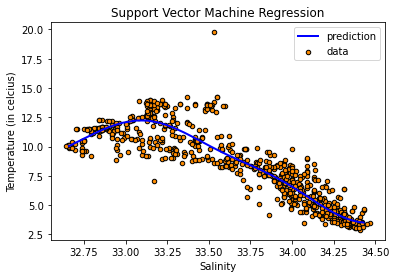

In [ ]:
# Sort
sorted_X_test = np.sort(X_test)  # Need to specify axis=0 if X_test has shape (n_samples, 0)


# Plot the results
def SVM_viz():
  plt.figure()
  plt.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
  plt.plot(sorted_X_test, SVMPR, color="blue", label="prediction", linewidth=2)
  plt.xlabel("Salinity")
  plt.ylabel("Temperature (in celcius)")
  plt.title("Support Vector Machine Regression")
  plt.legend()
  plt.show()

SVM_viz()

## **Side by side comparison of the 3 models**

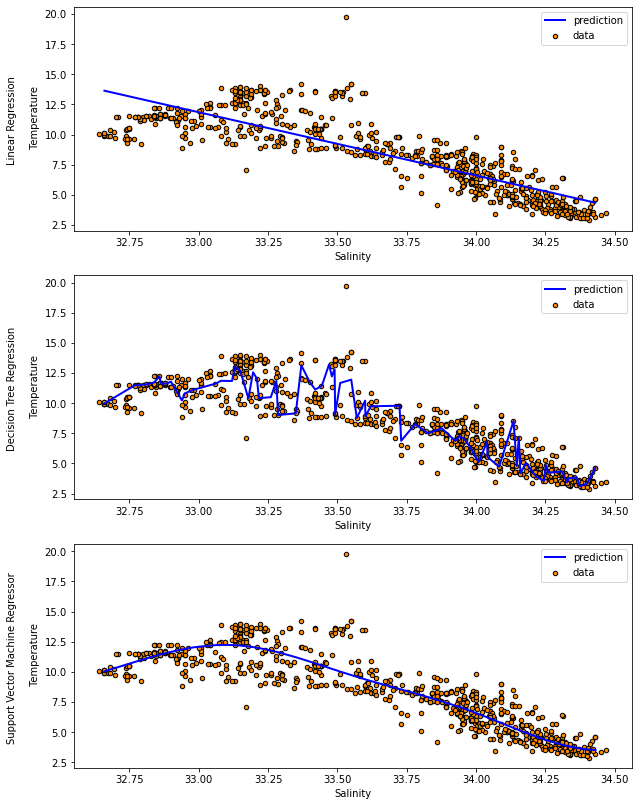

In [ ]:
#@title

from matplotlib.pyplot import figure
fig, (ax1, ax2,ax3) = plt.subplots(3, 1)
fig = plt.gcf()
fig.set_size_inches(10, 14)
fig.savefig('test2png.png', dpi=100)

ax1.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
ax1.plot(sorted_X_test, LRPR, color="blue", label="prediction", linewidth=2)
ax1.set_xlabel('Salinity')
ax1.set_ylabel("Linear Regression \n\n Temperature")
ax1.legend();

ax2.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
ax2.plot(sorted_X_test, DTPR, color="blue", label="prediction", linewidth=2)
ax2.set_xlabel('Salinity')
ax2.set_ylabel("Decision Tree Regression \n\n Temperature")
ax2.legend();

ax3.scatter(X_train, y_train, s=20, edgecolor="black", c="darkorange", label="data")
ax3.plot(sorted_X_test, SVMPR, color="blue", label="prediction", linewidth=2)
ax3.set_xlabel('Salinity')
ax3.set_ylabel("Support Vector Machine Regressor \n\n Temperature")
ax3.legend();

# 4. Cross Validation

In [ ]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)

score_lr = []
score_dt = []
score_svm = []

for train_index, test_index in kf.split(X_valid,y_valid):
   X_valid_train, X_valid_test = X_valid.iloc[train_index],X_valid.iloc[test_index]
   y_valid_train, y_valid_test =  y_valid.iloc[train_index], y_valid.iloc[test_index]

   score_lr.append(get_score(LR, X_valid_train.values.reshape(-1, 1),  X_valid_test.values.reshape(-1, 1), y_valid_train.values.reshape(-1, 1).ravel(), y_valid_test.values.reshape(-1, 1).ravel()))  
   score_dt.append(get_score(DT, X_valid_train.values.reshape(-1, 1),  X_valid_test.values.reshape(-1, 1), y_valid_train.values.reshape(-1, 1).ravel(), y_valid_test.values.reshape(-1, 1).ravel()))                                     
   score_svm.append(get_score(SVR, X_valid_train.values.reshape(-1, 1),  X_valid_test.values.reshape(-1, 1), y_valid_train.values.reshape(-1, 1).ravel(), y_valid_test.values.reshape(-1, 1).ravel()))           

In [ ]:
#@title
# defining a function for taking an average of a list
def Average(score): 
    avg = sum(score) / len(score)  
    return avg

In [ ]:
print("Average of Linear Regression is                ",Average(score_lr))
print("Average of Decision Tree Regressor is          ",Average(score_dt))
print("Average of Support Vector Machine Regressor is ",Average(score_svm))

Average of Linear Regression is                 0.7389285373426333
Average of Decision Tree Regressor is           0.7009932976258442
Average of Support Vector Machine Regressor is  0.8246928445376632


# 5. Calculate Scores

In [ ]:
from sklearn.model_selection import cross_val_score
import itertools

model = [LR,DT,SVR]
metrics = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
scores = []
for x in itertools.product(model, metrics):
  score = cross_val_score(x[0], X_valid.values.reshape(-1, 1), y_valid.values.reshape(-1, 1).ravel(),scoring = x[1], cv=3)
  average = score.mean()
  scores.append({
      'model': x[0],
      'metrics': x[1],
      'mean score': average
      
  })

model_scores = pd.DataFrame(scores,columns=['model','metrics','mean score'])
model_scores['mean score'] = model_scores['mean score'].abs()
model_scores

,model,metrics,mean score
0,LinearRegression(),neg_mean_squared_error,2.528771
1,LinearRegression(),neg_root_mean_squared_error,1.556021
2,LinearRegression(),neg_mean_absolute_error,1.152981
3,LinearRegression(),r2,0.758031
4,DecisionTreeRegressor(),neg_mean_squared_error,2.944130
5,DecisionTreeRegressor(),neg_root_mean_squared_error,1.712739
6,DecisionTreeRegressor(),neg_mean_absolute_error,1.233471
7,DecisionTreeRegressor(),r2,0.700745
8,SVR(),neg_mean_squared_error,1.899261
9,SVR(),neg_root_mean_squared_error,1.352214


# 6. Choose the best model


**MSE - the lower the value the better and 0 means the model is perfect**

In [ ]:
mse = model_scores.loc[model_scores['metrics'] == 'neg_mean_squared_error']
mse.loc[mse['mean score'].idxmin()]

model                          SVR()
metrics       neg_mean_squared_error
mean score                  1.899261
Name: 8, dtype: object

**RMSE - the lower the value the better**

In [ ]:
rmse = model_scores.loc[model_scores['metrics'] == 'neg_root_mean_squared_error']
rmse.loc[rmse['mean score'].idxmin()]

model                               SVR()
metrics       neg_root_mean_squared_error
mean score                       1.352214
Name: 9, dtype: object

**MAE - the lower the value the better**

In [ ]:
mae = model_scores.loc[model_scores['metrics'] == 'neg_mean_absolute_error']
mae.loc[mae['mean score'].idxmin()]

model                           SVR()
metrics       neg_mean_absolute_error
mean score                   1.016965
Name: 10, dtype: object

**R2 - the higher the value the better and 1 means the model is perfect**

In [ ]:
r2 = model_scores.loc[model_scores['metrics'] == 'r2']
r2.loc[r2['mean score'].idxmax()]

model            SVR()
metrics             r2
mean score    0.820861
Name: 11, dtype: object

**As we can see. On all of the evaluation metrics, support vector machine regressor has the better values compared to the 2 models.**

# 7. Evaluate the best model

In [ ]:
model = [SVR]
metrics = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
scores = []
for x in itertools.product(model, metrics):
  score = cross_val_score(x[0], X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1).ravel(),scoring = x[1], cv=3)
  average = score.mean()
  scores.append({
      'model': x[0],
      'metrics': x[1],
      'mean score': average
      
  })

SVR_scores = pd.DataFrame(scores,columns=['model','metrics','mean score'])
SVR_scores['mean score'] = SVR_scores['mean score'].abs()
SVR_scores

,model,metrics,mean score
0,SVR(),neg_mean_squared_error,2.154611
1,SVR(),neg_root_mean_squared_error,1.451166
2,SVR(),neg_mean_absolute_error,1.087201
3,SVR(),r2,0.801837


BONUS POINTS (+10 points): If you want a step further, you can tune your hyperparameters using Randomised Grid Search Cross-Validation. Here's the article: https://towardsdatascience.com/cross-validation-and-hyperparameter-tuning-how-to-optimise-your-machine-learning-model-13f005af9d7d

You can either use this before the model selection or apply it on the best model to maximize performance. 

Note that Set of Hyperparameters are model specific. So if you want to apply it before model selection for each of your model, you have to make sure that you know their individual sets of hyperparameters.



# 8. Hyperparameter Tuning using Randomised Grid Search Cross-Validation for the best model (Support Vector Regression)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

svr_kernel = ['linear', 'poly', 'rbf', 'sigmoid']
svr_degree = [1,2,3,4,5]
svr_gamma = ['scale','auto']
svr_C = [1.0,2.0,3.0]
svr_epsilon = [0.1,0.2,0.3,0.4]

svr_grid = {
    'kernel' : svr_kernel,
    'degree' : svr_degree,
    'gamma': svr_gamma,
    'C' : svr_C,
    'epsilon' : svr_epsilon

}
from sklearn.svm import SVR
svr_base =  SVR()

svr_random = RandomizedSearchCV(estimator = svr_base, param_distributions = svr_grid, 
                               cv = 3)

svr_random.fit(X_test.values.reshape(-1, 1),y_test.values.reshape(-1, 1).ravel())

svr_random.best_params_

{'C': 3.0, 'degree': 4, 'epsilon': 0.4, 'gamma': 'auto', 'kernel': 'rbf'}

**Applying the new parameters on SVR**

In [ ]:
from sklearn.svm import SVR
SVR = SVR(C = 3.0, degree = 4, epsilon = 0.4, gamma = 'auto', kernel = 'rbf')
model = [SVR]
metrics = ['neg_mean_squared_error', 'neg_root_mean_squared_error', 'neg_mean_absolute_error', 'r2']
scores = []
for x in itertools.product(model, metrics):
  score = cross_val_score(x[0], X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1).ravel(),scoring = x[1], cv=3)
  average = score.mean()
  scores.append({
      'model': x[0],
      'metrics': x[1],
      'mean score': average
      
  })

SVR_scores = pd.DataFrame(scores,columns=['model','metrics','mean score'])
SVR_scores['mean score'] = SVR_scores['mean score'].abs()
SVR_scores

,model,metrics,mean score
0,"SVR(C=3.0, degree=4, epsilon=0.4, gamma='auto')",neg_mean_squared_error,2.072851
1,"SVR(C=3.0, degree=4, epsilon=0.4, gamma='auto')",neg_root_mean_squared_error,1.428266
2,"SVR(C=3.0, degree=4, epsilon=0.4, gamma='auto')",neg_mean_absolute_error,1.075416
3,"SVR(C=3.0, degree=4, epsilon=0.4, gamma='auto')",r2,0.808050


**There is only a minimal improvement on the evaluation score after applying the best parameters from Randomised Grid Search Cross-Validation**